In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

sns.set(style="whitegrid")


In [3]:
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

print("Training Data Head:")
print(train_df.head())

print("Testing Data Head:")
print(test_df.head())


Training Data Head:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Green

In [4]:

train_df.isnull().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
train_df=train_df.drop(columns='Unnamed: 0')
test_df=test_df.drop(columns='Unnamed: 0')

In [7]:
test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
# Extract the year and month from the transaction date for further analysis
train_df['trans_date'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.date
train_df['trans_year'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.year
train_df['trans_month'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.month

# Similarly for the test set
test_df['trans_date'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.date
test_df['trans_year'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.year
test_df['trans_month'] = pd.to_datetime(test_df['trans_date_trans_time']).dt.month

# Transaction frequency feature
train_df['trans_freq'] = train_df.groupby('cc_num')['trans_date'].transform('count')
test_df['trans_freq'] = test_df.groupby('cc_num')['trans_date'].transform('count')

# Spending patterns feature
train_df['total_amt_spent'] = train_df.groupby('cc_num')['amt'].transform('sum')
test_df['total_amt_spent'] = test_df.groupby('cc_num')['amt'].transform('sum')

# Device usage could be inferred from the transaction location (latitude, longitude)
train_df['location_diff'] = np.sqrt((train_df['lat'] - train_df['merch_lat'])**2 + (train_df['long'] - train_df['merch_long'])**2)
test_df['location_diff'] = np.sqrt((test_df['lat'] - test_df['merch_lat'])**2 + (test_df['long'] - test_df['merch_long'])**2)


In [10]:

train_df['geo_segment'] = pd.cut(train_df['city_pop'], bins=[0, 50000, 100000, 500000, 1000000], labels=['Rural', 'Small Town', 'Urban', 'Metropolis'])
test_df['geo_segment'] = pd.cut(test_df['city_pop'], bins=[0, 50000, 100000, 500000, 1000000], labels=['Rural', 'Small Town', 'Urban', 'Metropolis'])


train_df['volume_segment'] = pd.cut(train_df['total_amt_spent'], bins=3, labels=['Low Spender', 'Medium Spender', 'High Spender'])
test_df['volume_segment'] = pd.cut(test_df['total_amt_spent'], bins=3, labels=['Low Spender', 'Medium Spender', 'High Spender'])


In [11]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,trans_date,trans_year,trans_month,trans_freq,total_amt_spent,location_diff,geo_segment,volume_segment
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,2019-01-01,2019,1,2028,177233.44,0.872830,Rural,Medium Spender
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,2019-01-01,2019,1,3030,163466.44,0.272310,Rural,Medium Spender
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,2019-01-01,2019,1,503,33132.63,0.975845,Rural,Low Spender
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,2019-01-01,2019,1,493,35878.90,0.919802,Rural,Low Spender
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,2019-01-01,2019,1,2017,191974.21,0.868505,Rural,Medium Spender


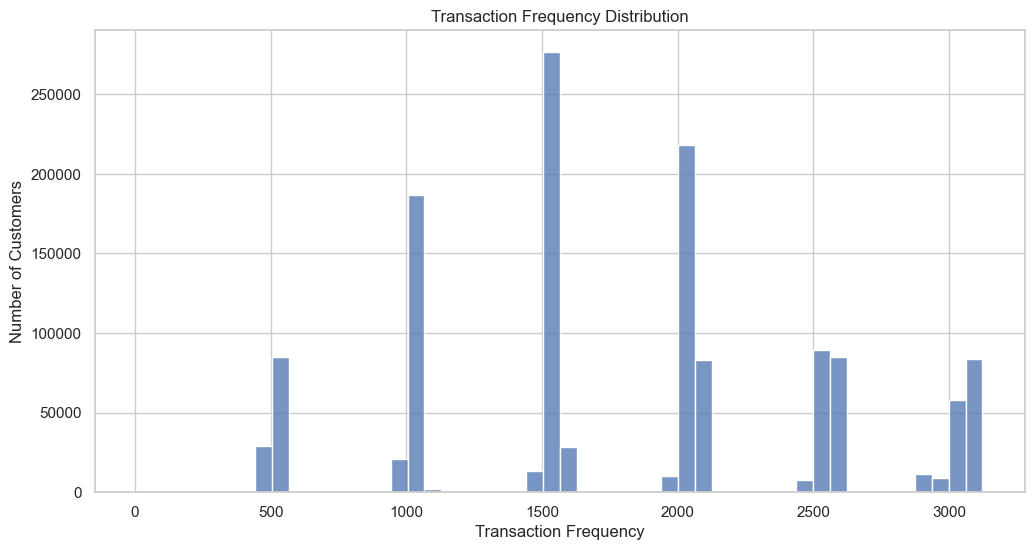

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['trans_freq'], kde=False, bins=50)
plt.title('Transaction Frequency Distribution')
plt.xlabel('Transaction Frequency')
plt.ylabel('Number of Customers')
plt.show()


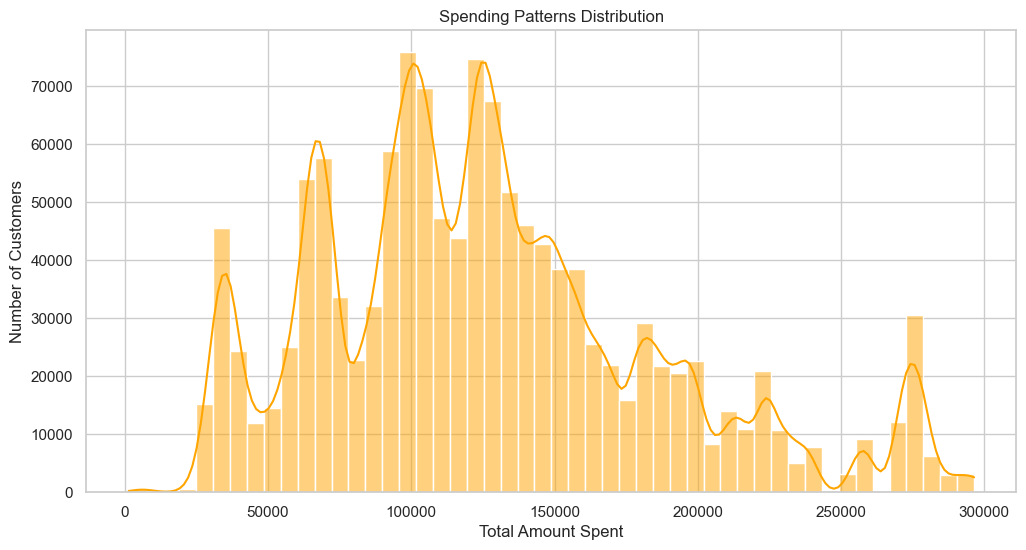

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['total_amt_spent'], kde=True, bins=50, color='orange')
plt.title('Spending Patterns Distribution')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.show()


In [14]:
# Display the processed training data
print("Processed Training Data Head:")
print(train_df.head())

# Display the processed testing data
print("Processed Testing Data Head:")
print(test_df.head())


Processed Training Data Head:
  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...  merch_long  is_fraud  \
0                561 Perry Cove  Moravian Falls  ...  -82.048315         0

In [15]:
# Save the processed data to new CSV files
train_df.to_csv('processed_fraudTrain.csv', index=False)
test_df.to_csv('processed_fraudTest.csv', index=False)

# Confirm that files have been saved
print("Processed training data saved to 'processed_fraudTrain.csv'.")
print("Processed test data saved to 'processed_fraudTest.csv'.")


Processed training data saved to 'processed_fraudTrain.csv'.
Processed test data saved to 'processed_fraudTest.csv'.


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan



# Load the data

In [17]:

df = pd.read_csv('processed_fraudTrain.csv')

features = df[['amt', 'trans_freq', 'total_amt_spent', 'location_diff', 'geo_segment', 'volume_segment', "cc_num"]]
features = pd.get_dummies(features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


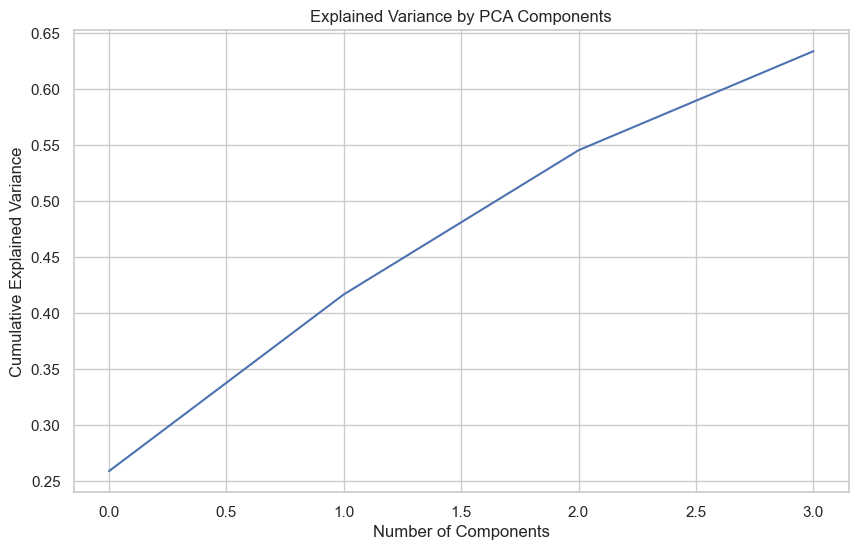

In [18]:
# Check the shape of X_scaled to determine the max components
n_samples, n_features = X_scaled.shape
max_components = min(n_samples, n_features)

# Adjust PCA to use max_components or a number smaller
pca = PCA(n_components=min(4, n_features))  # For example, using 11 components
X_pca = pca.fit_transform(X_scaled)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [19]:
# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features.columns)
print(loadings)


                                    PC1       PC2       PC3       PC4
amt                            0.012014  0.028751  0.059977 -0.003527
trans_freq                     0.525964 -0.007598  0.035869 -0.002559
total_amt_spent                0.528315  0.100577  0.209879 -0.004811
location_diff                  0.000123  0.001829 -0.001631 -0.001330
cc_num                        -0.012458  0.013674  0.085378  0.322368
geo_segment_Metropolis        -0.054385  0.235251 -0.087398  0.440204
geo_segment_Rural             -0.032718 -0.644009  0.331956 -0.052138
geo_segment_Small Town         0.026065  0.351466 -0.069333  0.555148
geo_segment_Urban              0.037539  0.432424 -0.339971 -0.603338
volume_segment_High Spender    0.312784  0.278915  0.557339 -0.091947
volume_segment_Low Spender    -0.510661  0.153073  0.232492 -0.064602
volume_segment_Medium Spender  0.281461 -0.327071 -0.583845  0.121256


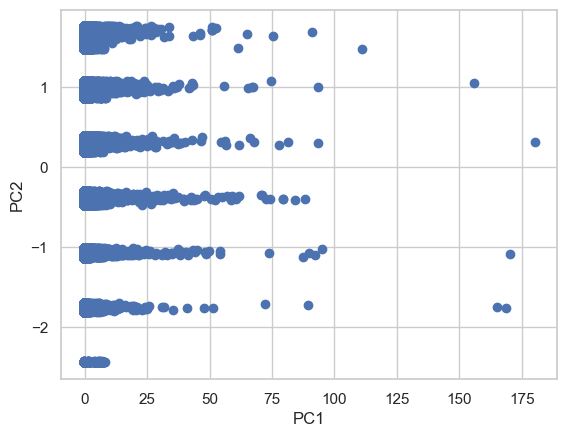

In [20]:
# Now we can plot the first two principal components
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

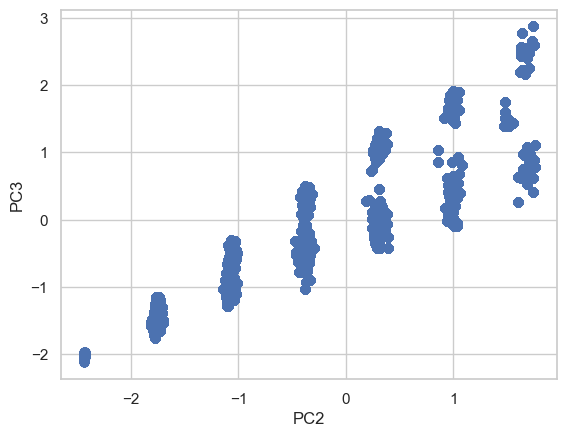

In [21]:
# Now we can plot the second and third principal components
plt.scatter(X_scaled[:,1], X_scaled[:,2])
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

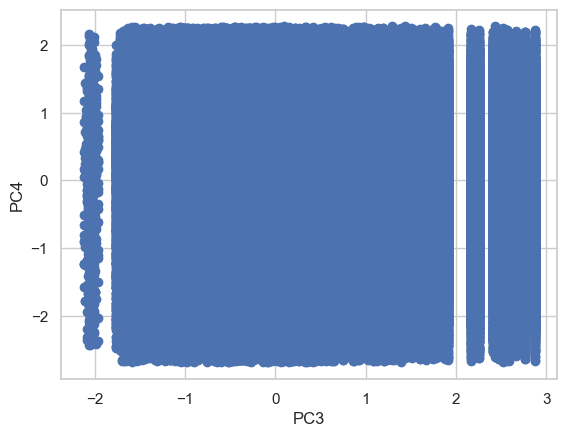

In [22]:
# Now we can plot the third and forth principal components
plt.scatter(X_scaled[:,2], X_scaled[:,3])
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

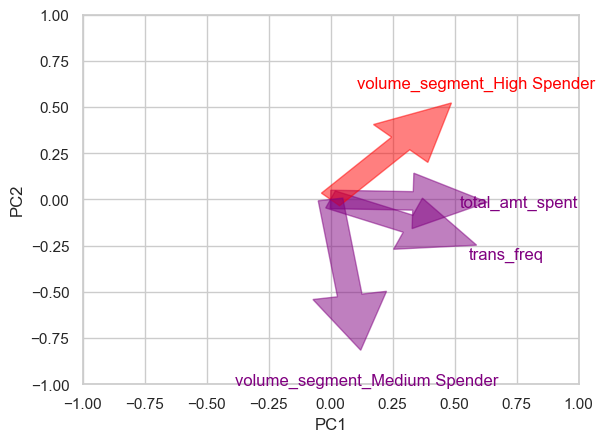

In [23]:
# Prepare the data for PCA
X = features[[ 'trans_freq', 'total_amt_spent', "volume_segment_High Spender", "volume_segment_Medium Spender"  ]]
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

# t-SNE Implementation and Visualization 

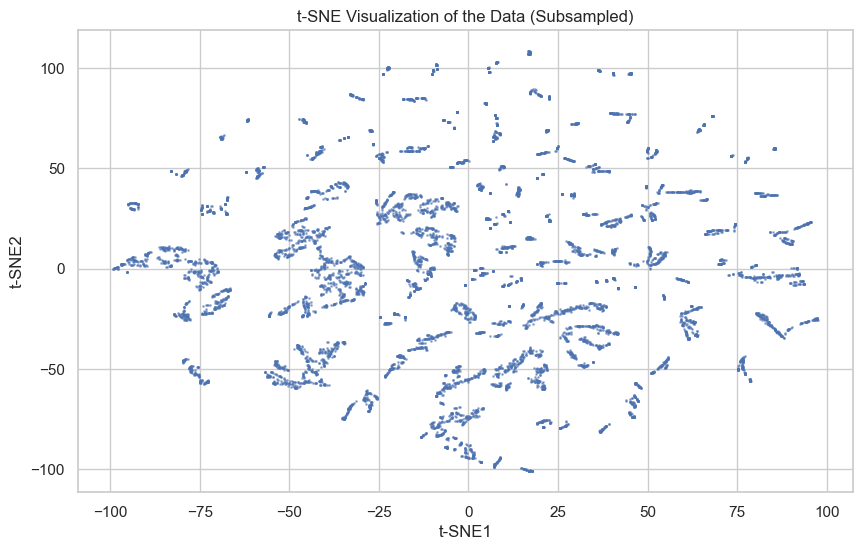

In [24]:
# Subsample the data for t-SNE (e.g., 10,000 samples)
sample_size = 10000
X_sampled = X_pca[np.random.choice(X_pca.shape[0], sample_size, replace=False), :]

# Reduce to 2D with t-SNE on the subsample
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

# Visualize the t-SNE result
plt.figure(figsize=(10, 6))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=1, alpha=0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Visualization of the Data (Subsampled)')
plt.show()


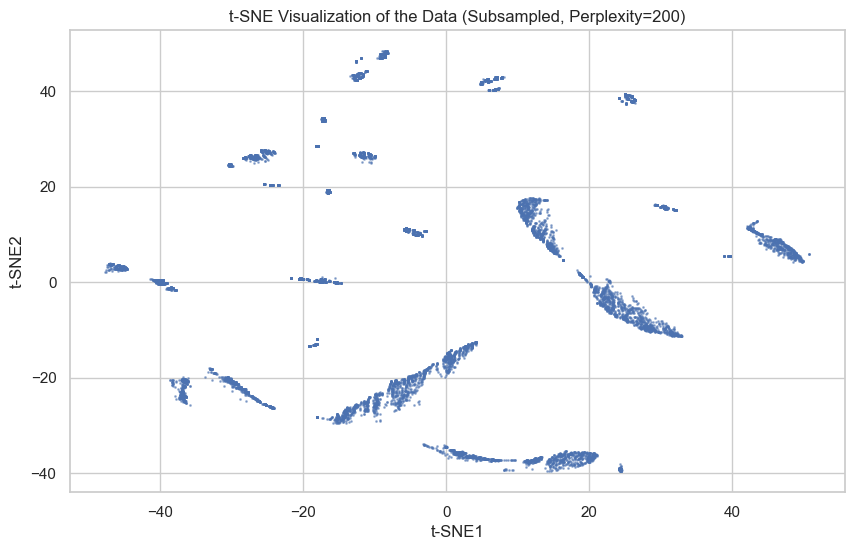

In [25]:
import plotly.express as px
sample_size = 10000
X_sampled = X_pca[np.random.choice(X_pca.shape[0], sample_size, replace=False), :]

# Use the original high-dimensional data (X_sampled) for t-SNE
perplexity = np.arange(50, 300, 50)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i, random_state=42)
    reduced = model.fit_transform(X_sampled)
    
    divergence.append(model.kl_divergence_)

# Plotting the KL divergence against perplexity values
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

# Visualize the t-SNE result for a specific perplexity (e.g., 200)
plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], s=1, alpha=0.5)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Visualization of the Data (Subsampled, Perplexity=200)')
plt.show()


# Elbow method

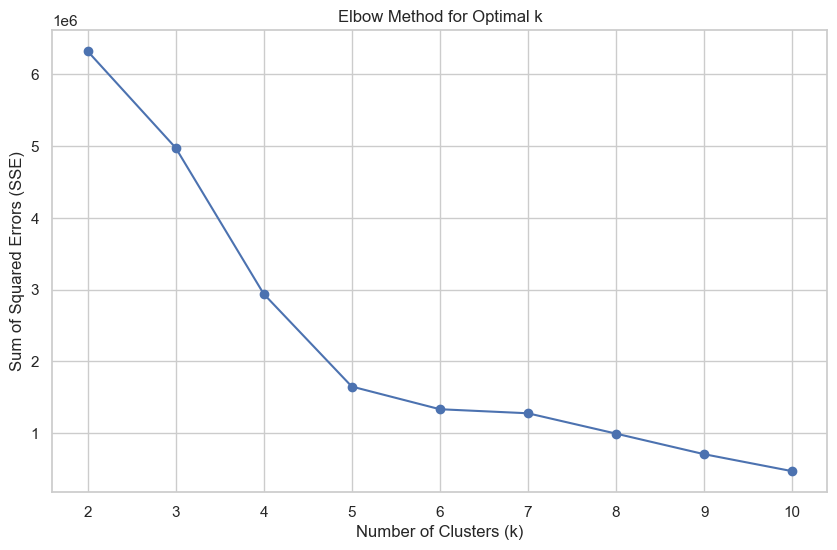

In [26]:

sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



# k-means

In [27]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



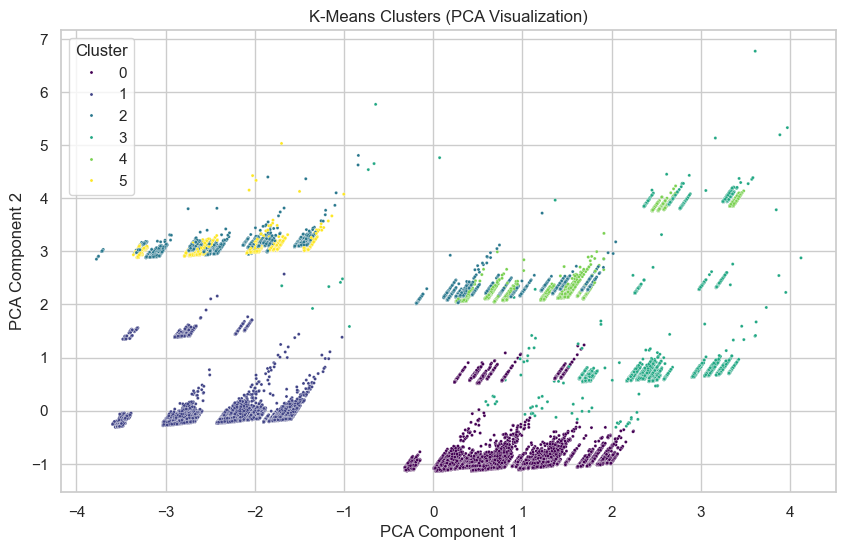

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=5)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Hierarchical Clustering

In [29]:
# Subsample the data
sample_size = 10000  
X_sampled = X_pca[np.random.choice(X_pca.shape[0], sample_size, replace=False), :]

# Hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5)  
cluster_labels = hierarchical_clustering.fit_predict(X_sampled)

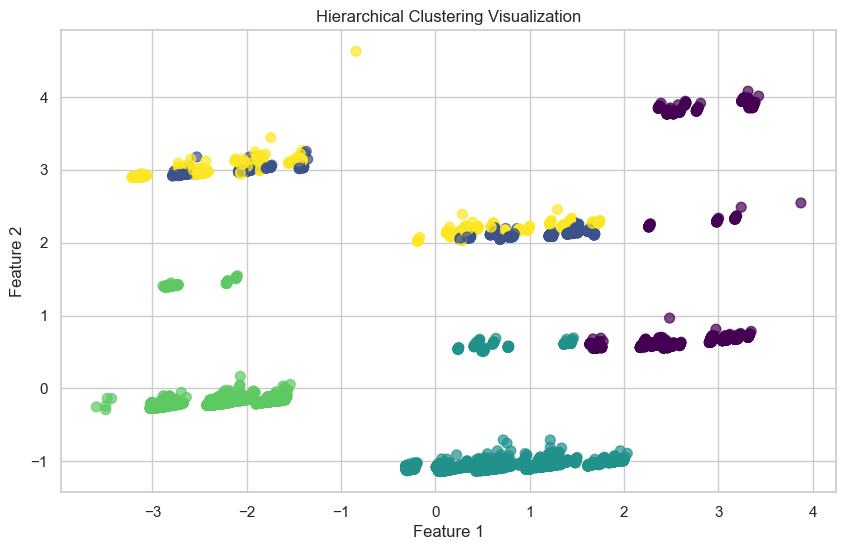

In [30]:
# Assuming X_sampled is your subsampled data and cluster_labels are the assigned labels

plt.figure(figsize=(10, 6))
plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# BIRCH clustering

In [31]:
from sklearn.cluster import Birch

# Use the entire X_pca data for BIRCH clustering
birch = Birch(n_clusters=5)
cluster_labels = birch.fit_predict(X_pca)

# Add the cluster labels to a new column in the DataFrame
df['BIRCH_Cluster'] = cluster_labels

In [32]:
# Check if the BIRCH clustering was successful
if 'BIRCH_Cluster' in df.columns:
    print("BIRCH clustering applied successfully!")
else:
    print("BIRCH clustering failed.")

BIRCH clustering applied successfully!


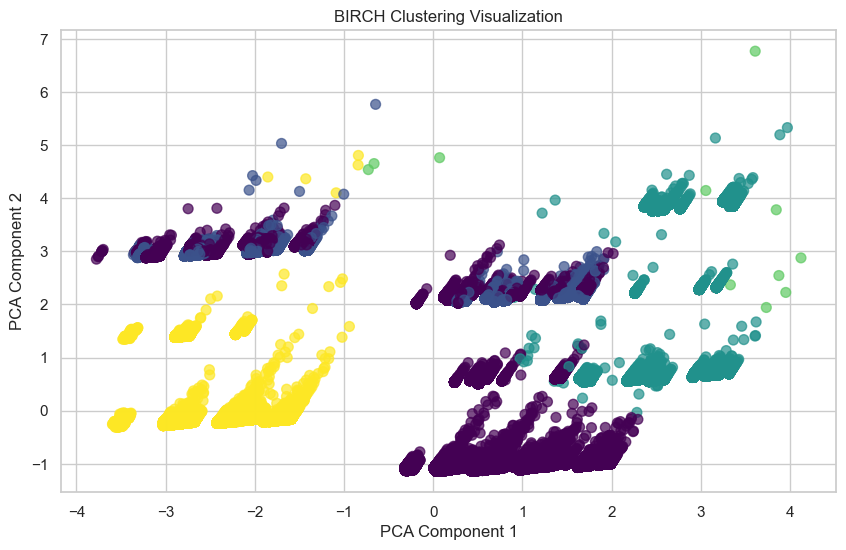

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['BIRCH_Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('BIRCH Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Silhouette score

In [34]:
# for K-Means
# kmeans_silhouette = silhouette_score(X_pca, df['KMeans_Cluster'])
# print(f'Silhouette Score for K-Means: {kmeans_silhouette:.4f}')


# for Hierarchical Clustering
# hierarchical_silhouette = silhouette_score(X_pca, df_sampled['HDBSCAN_Cluster'])
# print(f'Silhouette Score for Hierarchical Clustering: {hierarchical_silhouette:.4f}')

# silhouette_birch = silhouette_score(X_pca, df['BIRCH_Cluster'])
# print("Silhouette Coefficient for BIRCH:", silhouette_birch)

# silhouette_hierarchical = silhouette_score(X_pca, df['Hierarchical_Cluster'])
# print("Silhouette Coefficient for Hierarchical Clustering:", silhouette_hierarchical)


In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_df[['location_diff', 'trans_freq', 'total_amt_spent']], train_df['is_fraud'])

In [36]:
# Separate features and target for supervised learning
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)

# **Unsupervised Algorithm**

# **a. Isolation Forest**

In [37]:
# Convert 'trans_date_trans_time' to datetime in both datasets if applicable
# Example, replace 'trans_date_trans_time' with the actual column name in your dataset
if 'trans_date_trans_time' in train_df.columns:
    train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
    test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])

    # Extract date features
    for df in [train_df, test_df]:
        df['hour'] = df['trans_date_trans_time'].dt.hour
        df['day'] = df['trans_date_trans_time'].dt.day
        df['month'] = df['trans_date_trans_time'].dt.month
        df['year'] = df['trans_date_trans_time'].dt.year
        df['weekday'] = df['trans_date_trans_time'].dt.weekday

    # Drop the original datetime column
    train_df = train_df.drop('trans_date_trans_time', axis=1)
    test_df = test_df.drop('trans_date_trans_time', axis=1)


In [38]:
# Encoding Categorical Features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define feature columns
numerical_features = ['amt', 'total_amt_spent', 'location_diff', 'hour', 'day', 'month', 'year', 'weekday']
categorical_features = ['category', 'gender', 'geo_segment']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Separate features and target
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [39]:
from sklearn.ensemble import IsolationForest

# Create and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination according to your needs
iso_forest.fit(X_train_preprocessed)

# Predict anomalies
train_anomalies = iso_forest.predict(X_train_preprocessed)  # -1 for anomaly, 1 for normal
test_anomalies = iso_forest.predict(X_test_preprocessed)

# Convert predictions to DataFrames
train_anomalies_df = pd.DataFrame({'anomaly': train_anomalies})
test_anomalies_df = pd.DataFrame({'anomaly': test_anomalies})

# Add indices if needed
train_anomalies_df.index = X_train.index
test_anomalies_df.index = X_test.index


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert predictions to binary (0 for normal, 1 for anomaly)
train_anomalies_binary = [1 if x == -1 else 0 for x in train_anomalies]
test_anomalies_binary = [1 if x == -1 else 0 for x in test_anomalies]

# Ensure y_test is binary (0 or 1) if it's not already
y_train_binary = [1 if x > 0 else 0 for x in y_train]  # Assuming positive values in y_train indicate fraud
y_test_binary = [1 if x > 0 else 0 for x in y_test]  # Assuming positive values in y_test indicate fraud

# Calculate accuracy
accuracy_train = accuracy_score(y_train_binary, train_anomalies_binary)
accuracy_test = accuracy_score(y_test_binary, test_anomalies_binary)

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train_binary, train_anomalies_binary)
conf_matrix_test = confusion_matrix(y_test_binary, test_anomalies_binary)

print("Training Confusion Matrix:")
print(conf_matrix_train)

print("Testing Confusion Matrix:")
print(conf_matrix_test)


Training Accuracy: 0.9852461102435074
Testing Accuracy: 0.9638810262020914
Training Confusion Matrix:
[[1276873   12296]
 [   6835     671]]
Testing Confusion Matrix:
[[535339  18235]
 [  1837    308]]


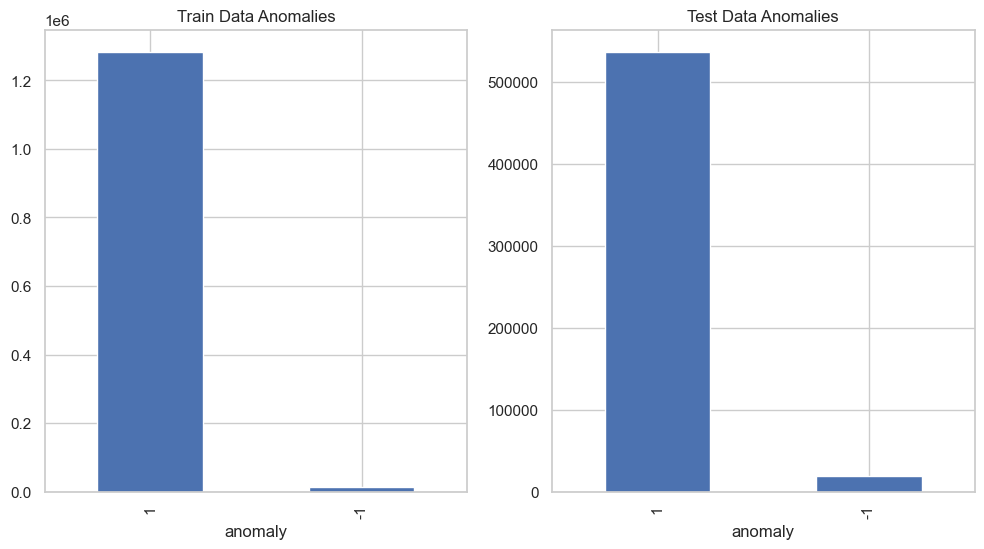

In [41]:
import matplotlib.pyplot as plt

# Distribution of anomalies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
train_anomalies_df['anomaly'].value_counts().plot(kind='bar')
plt.title('Train Data Anomalies')

plt.subplot(1, 2, 2)
test_anomalies_df['anomaly'].value_counts().plot(kind='bar')
plt.title('Test Data Anomalies')

plt.show()


# **c. Autoencoder**

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the Autoencoder architecture
input_dim = X_train_preprocessed.shape[1]

In [43]:
# Define the Autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# Train the Autoencoder
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = autoencoder.fit(X_train_preprocessed, X_train_preprocessed,
                          epochs=10,
                          batch_size=128,
                          validation_split=0.2,
                          callbacks=[early_stopping],
                          verbose=1)

Epoch 1/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 0.2009 - val_loss: 0.2330
Epoch 2/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.1748 - val_loss: 0.2306
Epoch 3/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.1767 - val_loss: 0.2304
Epoch 4/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1716 - val_loss: 0.2288
Epoch 5/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1747 - val_loss: 0.2286
Epoch 6/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.1687 - val_loss: 0.2272
Epoch 7/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - loss: 0.1753 - val_loss: 0.2272
Epoch 8/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 0.1708 - val_loss: 0.2272
Epoch 9/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1721 - val_loss: 0.2272
Epoch 10/10
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1721 - val_loss: 0.2263


In [45]:
# Predict anomalies
train_reconstructions = autoencoder.predict(X_train_preprocessed)
test_reconstructions = autoencoder.predict(X_test_preprocessed)

40522/40522 ━━━━━━━━━━━━━━━━━━━━ 117s 3ms/step
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step


In [46]:
# Calculate reconstruction errors
train_errors = np.mean(np.square(X_train_preprocessed - train_reconstructions), axis=1)
test_errors = np.mean(np.square(X_test_preprocessed - test_reconstructions), axis=1)
print(test_errors)
print(train_errors)

[0.27773957 0.15894988 0.10870278 ... 0.13831006 0.19833363 0.16986078]
[0.34467447 0.44215566 0.4247736  ... 0.09147284 0.13517116 0.1014906 ]


In [47]:
# Set a threshold for anomalies
threshold = np.percentile(train_errors, 95)  # Example: 95th percentile
print(threshold)

0.3183839490739123


In [48]:
# Predict anomalies based on threshold
train_anomalies = (train_errors > threshold).astype(int)  # 1 for anomaly, 0 for normal
test_anomalies = (test_errors > threshold).astype(int)  # 1 for anomaly, 0 for normal
print(train_anomalies)
print(test_anomalies)

[1 1 1 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [49]:
# Convert predictions to DataFrames
train_anomalies_df = pd.DataFrame({'anomaly': train_anomalies})
test_anomalies_df = pd.DataFrame({'anomaly': test_anomalies})

In [50]:
# Add indices if needed
train_anomalies_df.index = X_train.index
test_anomalies_df.index = X_test.index

In [51]:
# Calculate accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
# Convert y_train and y_test to binary (0 or 1)
y_train_binary = [1 if x > 0 else 0 for x in y_train]  # Assuming positive values in y_train indicate fraud
y_test_binary = [1 if x > 0 else 0 for x in y_test]  # Assuming positive values in y_test indicate fraud


In [53]:
# Calculate accuracy
accuracy_train = accuracy_score(y_train_binary, train_anomalies)
accuracy_test = accuracy_score(y_test_binary, test_anomalies)
print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

Training Accuracy: 0.9506414483197408
Testing Accuracy: 0.8640859859029474


In [54]:
# Calculate confusion matrix
conf_matrix_train = confusion_matrix(y_train_binary, train_anomalies)
conf_matrix_test = confusion_matrix(y_test_binary, test_anomalies)

print("Training Confusion Matrix:")
print(conf_matrix_train)

print("Testing Confusion Matrix:")
print(conf_matrix_test)

Training Confusion Matrix:
[[1228504   60665]
 [   3337    4169]]
Testing Confusion Matrix:
[[478821  74753]
 [   777   1368]]


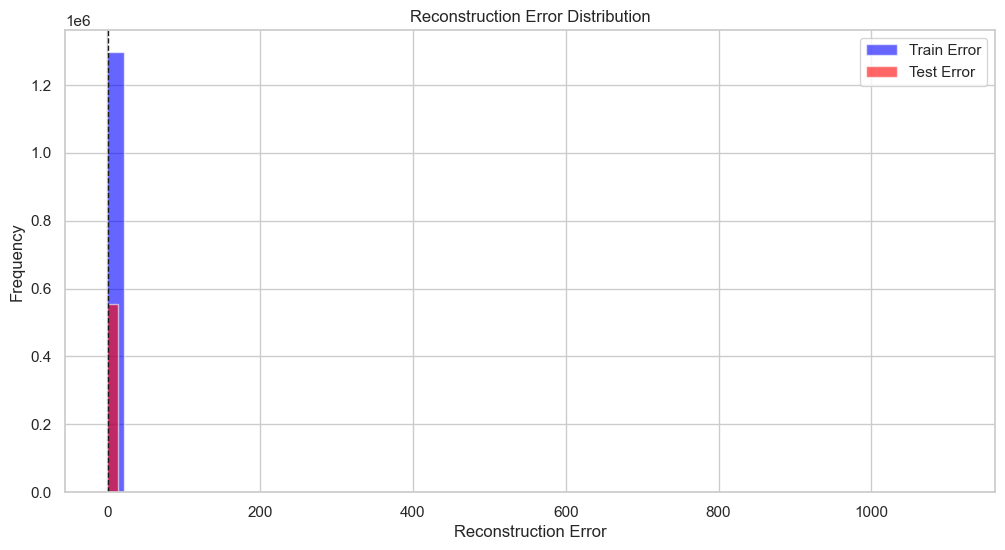

In [55]:
# Plot the reconstruction loss
plt.figure(figsize=(12, 6))
plt.hist(train_errors, bins=50, alpha=0.6, color='blue', label='Train Error')
plt.hist(test_errors, bins=50, alpha=0.6, color='red', label='Test Error')
plt.axvline(threshold, color='k', linestyle='dashed', linewidth=1)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **Supervised Algorithms**

# a. Random Forest

In [56]:
# Import the necessary module
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# Predict on test data
y_pred_train = rf_classifier.predict(X_train_preprocessed)
y_pred_test = rf_classifier.predict(X_test_preprocessed)

In [58]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9999969151869204
Testing Accuracy: 0.9472017332500778


In [59]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Training Confusion Matrix:")
print(conf_matrix_train)

print("Testing Confusion Matrix:")
print(conf_matrix_test)

Training Confusion Matrix:
[[1289169       0]
 [      4    7502]]
Testing Confusion Matrix:
[[524882  28692]
 [   649   1496]]


In [60]:
# Classification Report

from sklearn.metrics import classification_report # Import the missing function

print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.70      0.09      2145

    accuracy                           0.95    555719
   macro avg       0.52      0.82      0.53    555719
weighted avg       1.00      0.95      0.97    555719



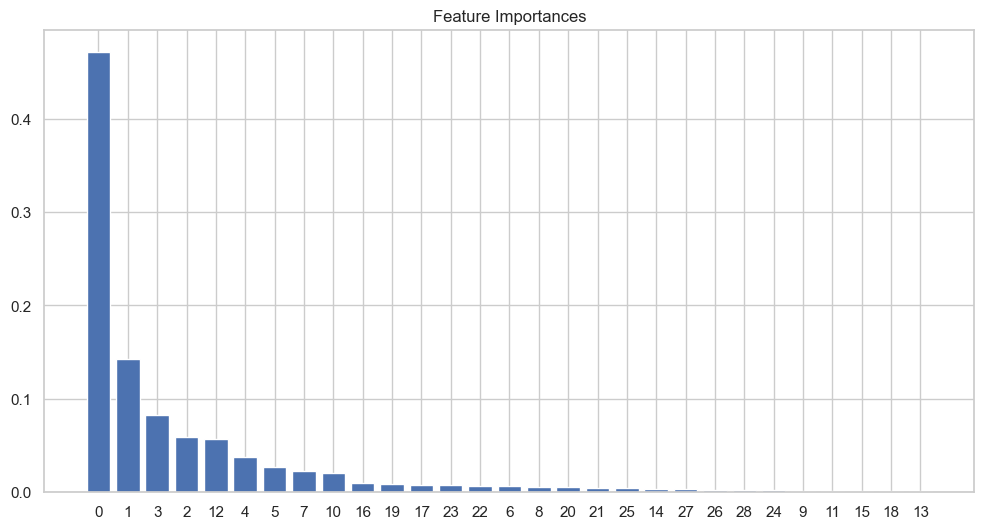

In [61]:
# Visualize Feature Importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_preprocessed.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_preprocessed.shape[1]), indices)
plt.show()

# b. Gradient Boosting Machine

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train_preprocessed, y_train)


GradientBoostingClassifier(random_state=42)

In [63]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9999969151869204
Testing Accuracy: 0.9472017332500778


In [64]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Training Confusion Matrix:")
print(conf_matrix_train)

print("Testing Confusion Matrix:")
print(conf_matrix_test)

Training Confusion Matrix:
[[1289169       0]
 [      4    7502]]
Testing Confusion Matrix:
[[524882  28692]
 [   649   1496]]


In [65]:
# Classification Report
print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00      7506

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675

Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.70      0.09      2145

    accuracy                           0.95    555719
   macro avg       0.52      0.82      0.53    555719
weighted avg       1.00      0.95      0.97    555719



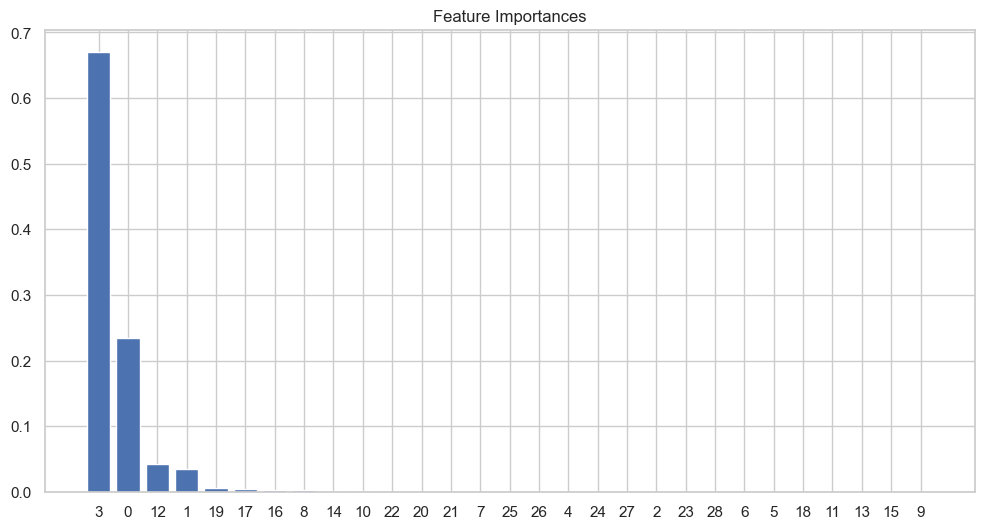

In [66]:
# Visualize Feature Importances
importances = gbm_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train_preprocessed.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_preprocessed.shape[1]), indices)
plt.show()

# c. Neural Networks

In [67]:
from sklearn.compose import ColumnTransformer
from tensorflow.keras import layers, models

In [68]:
# Build Neural Network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [69]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [70]:
# Train the model
history = model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 203s 6ms/step - accuracy: 0.9961 - loss: 0.0180 - val_accuracy: 0.9977 - val_loss: 0.0093
Epoch 2/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 187s 6ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9978 - val_loss: 0.0079
Epoch 3/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 187s 6ms/step - accuracy: 0.9979 - loss: 0.0080 - val_accuracy: 0.9979 - val_loss: 0.0080
Epoch 4/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 210s 6ms/step - accuracy: 0.9980 - loss: 0.0078 - val_accuracy: 0.9979 - val_loss: 0.0080
Epoch 5/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 172s 5ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9978 - val_loss: 0.0082
Epoch 6/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 193s 6ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 0.9979 - val_loss: 0.0084
Epoch 7/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 195s 6ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9978 - val_loss: 0.0078
Epoch 8/10
32417/32417 ━━━━━━━━━━━━━━━━━━━━ 181s 6ms/step - ac

In [71]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_preprocessed, y_train)
test_loss, test_accuracy = model.evaluate(X_test_preprocessed, y_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


40522/40522 ━━━━━━━━━━━━━━━━━━━━ 239s 6ms/step - accuracy: 0.9979 - loss: 0.0077
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 103s 6ms/step - accuracy: 0.9976 - loss: 0.0089
Training Accuracy: 0.998102068901062
Testing Accuracy: 0.9978622198104858


In [72]:
# Confusion Matrix and Classification Report
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing Confusion Matrix:")
print(conf_matrix_test)

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

Testing Confusion Matrix:
[[524882  28692]
 [   649   1496]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.05      0.70      0.09      2145

    accuracy                           0.95    555719
   macro avg       0.52      0.82      0.53    555719
weighted avg       1.00      0.95      0.97    555719



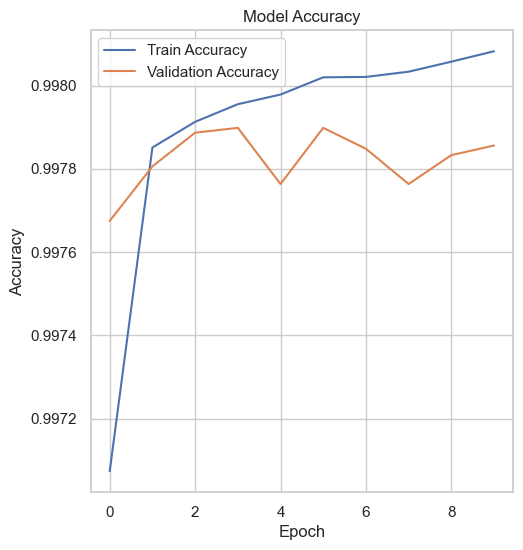

In [73]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

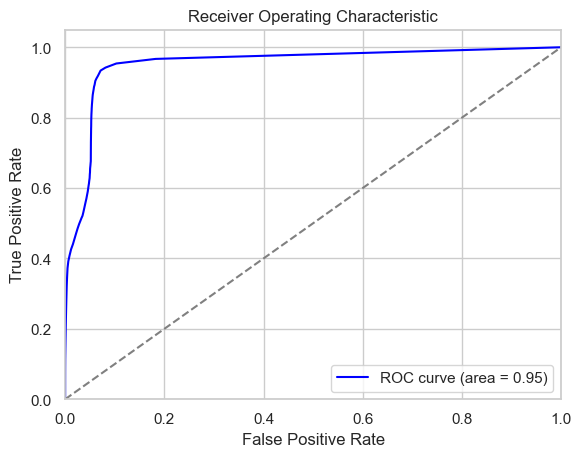

Random Forest AUC-ROC: 0.9524876302221337


In [74]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Evaluate AUC-ROC
def evaluate_auc_roc(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return auc_roc

# Random Forest
rf_auc_roc = evaluate_auc_roc(rf_classifier, X_test_preprocessed, y_test)
print(f"Random Forest AUC-ROC: {rf_auc_roc}")

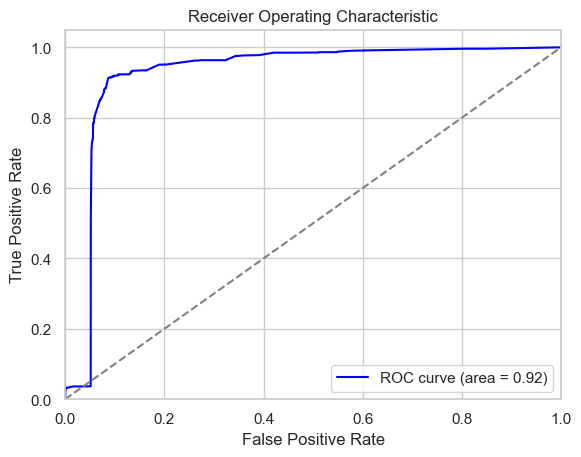

Gradient Boosting AUC-ROC: 0.9249851890604527


In [75]:
# Gradient Boosting
gbm_auc_roc = evaluate_auc_roc(gbm_classifier, X_test_preprocessed, y_test)
print(f"Gradient Boosting AUC-ROC: {gbm_auc_roc}")

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt


In [77]:
def compute_metrics(model, X, y_true):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred_proba)

    return precision, recall, f1, auc_roc, y_pred_proba

def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_pred_proba))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


Random Forest Metrics (Train):
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
AUC-ROC: 1.00
Random Forest Metrics (Test):
Precision: 0.05
Recall: 0.70
F1-Score: 0.09
AUC-ROC: 0.95


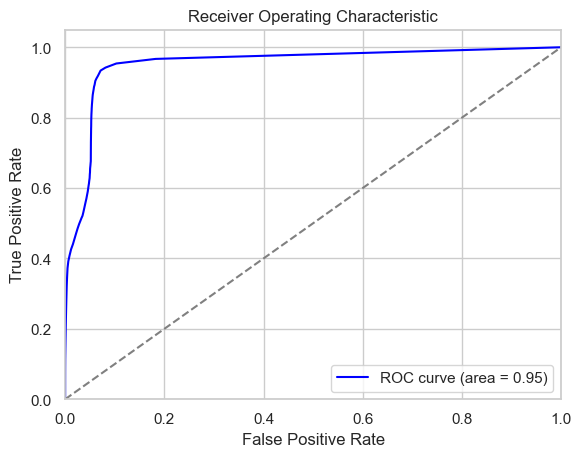

In [78]:
# Compute metrics for training and testing datasets
rf_train_precision, rf_train_recall, rf_train_f1, rf_train_auc_roc, rf_train_proba = compute_metrics(rf_classifier, X_train_preprocessed, y_train)
rf_test_precision, rf_test_recall, rf_test_f1, rf_test_auc_roc, rf_test_proba = compute_metrics(rf_classifier, X_test_preprocessed, y_test)

print("Random Forest Metrics (Train):")
print(f"Precision: {rf_train_precision:.2f}")
print(f"Recall: {rf_train_recall:.2f}")
print(f"F1-Score: {rf_train_f1:.2f}")
print(f"AUC-ROC: {rf_train_auc_roc:.2f}")

print("Random Forest Metrics (Test):")
print(f"Precision: {rf_test_precision:.2f}")
print(f"Recall: {rf_test_recall:.2f}")
print(f"F1-Score: {rf_test_f1:.2f}")
print(f"AUC-ROC: {rf_test_auc_roc:.2f}")

# Plot ROC curve for test set
plot_roc_curve(y_test, rf_test_proba)


Gradient Boosting Metrics (Train):
Precision: 0.83
Recall: 0.64
F1-Score: 0.72
AUC-ROC: 0.98
Gradient Boosting Metrics (Test):
Precision: 0.04
Recall: 0.63
F1-Score: 0.08
AUC-ROC: 0.92


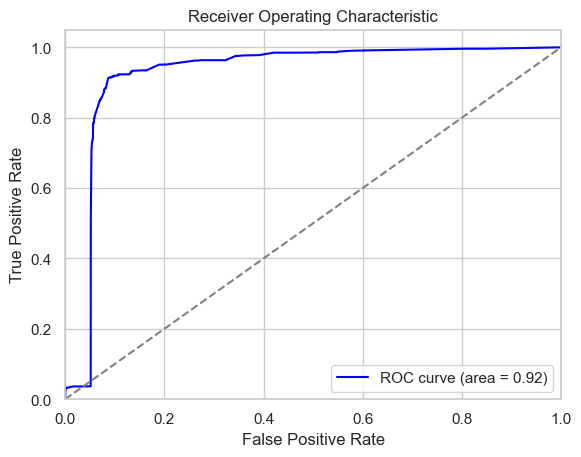

In [79]:
# Compute metrics for training and testing datasets
gbm_train_precision, gbm_train_recall, gbm_train_f1, gbm_train_auc_roc, gbm_train_proba = compute_metrics(gbm_classifier, X_train_preprocessed, y_train)
gbm_test_precision, gbm_test_recall, gbm_test_f1, gbm_test_auc_roc, gbm_test_proba = compute_metrics(gbm_classifier, X_test_preprocessed, y_test)

print("Gradient Boosting Metrics (Train):")
print(f"Precision: {gbm_train_precision:.2f}")
print(f"Recall: {gbm_train_recall:.2f}")
print(f"F1-Score: {gbm_train_f1:.2f}")
print(f"AUC-ROC: {gbm_train_auc_roc:.2f}")

print("Gradient Boosting Metrics (Test):")
print(f"Precision: {gbm_test_precision:.2f}")
print(f"Recall: {gbm_test_recall:.2f}")
print(f"F1-Score: {gbm_test_f1:.2f}")
print(f"AUC-ROC: {gbm_test_auc_roc:.2f}")

# Plot ROC curve for test set
plot_roc_curve(y_test, gbm_test_proba)


In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# For the Random Forest model
y_pred_rf = rf_classifier.predict(X_test_preprocessed)
print("Random Forest Metrics:")
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, rf_classifier.predict_proba(X_test_preprocessed)[:,1]))

# For the Gradient Boosting Machine model
y_pred_gbm = gbm_classifier.predict(X_test_preprocessed)
print("Gradient Boosting Metrics:")
print("Precision:", precision_score(y_test, y_pred_gbm))
print("Recall:", recall_score(y_test, y_pred_gbm))
print("F1 Score:", f1_score(y_test, y_pred_gbm))
print("AUC-ROC:", roc_auc_score(y_test, gbm_classifier.predict_proba(X_test_preprocessed)[:,1]))

# For the Neural Network model
y_pred_nn = (model.predict(X_test_preprocessed) > 0.5).astype(int)
print("Neural Network Metrics:")
print("Precision:", precision_score(y_test, y_pred_nn))
print("Recall:", recall_score(y_test, y_pred_nn))
print("F1 Score:", f1_score(y_test, y_pred_nn))
print("AUC-ROC:", roc_auc_score(y_test, model.predict(X_test_preprocessed)))


Random Forest Metrics:
Precision: 0.04955611501258778
Recall: 0.6974358974358974
F1 Score: 0.09253703646429344
AUC-ROC: 0.9524876302221337
Gradient Boosting Metrics:
Precision: 0.04485192269639206
Recall: 0.634032634032634
F1 Score: 0.08377737394893277
AUC-ROC: 0.9249851890604527
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 71s 4ms/step
Neural Network Metrics:
Precision: 0.7256011315417256
Recall: 0.7174825174825175
F1 Score: 0.7215189873417721
17367/17367 ━━━━━━━━━━━━━━━━━━━━ 110s 6ms/step
AUC-ROC: 0.9899852981628859


In [81]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy Scores:", cv_scores_rf)
print("Mean Cross-Validation Accuracy:", cv_scores_rf.mean())

# Cross-validation for Gradient Boosting Machine
cv_scores_gbm = cross_val_score(gbm_classifier, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Machine Cross-Validation Accuracy Scores:", cv_scores_gbm)
print("Mean Cross-Validation Accuracy:", cv_scores_gbm.mean())

# Cross-validation for Neural Network
from sklearn.model_selection import KFold
import tensorflow as tf

def evaluate_nn_model(X_train, y_train):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    return model, history

kf = KFold(n_splits=5)
nn_scores = []
for train_index, val_index in kf.split(X_train_preprocessed):
    X_train_cv, X_val_cv = X_train_preprocessed[train_index], X_train_preprocessed[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]
    nn_model, _ = evaluate_nn_model(X_train_cv, y_train_cv)
    val_loss, val_accuracy = nn_model.evaluate(X_val_cv, y_val_cv)
    nn_scores.append(val_accuracy)
print("Neural Network Cross-Validation Accuracy Scores:", nn_scores)
print("Mean Cross-Validation Accuracy:", np.mean(nn_scores))


Random Forest Cross-Validation Accuracy Scores: [0.99809127 0.99796017 0.99812983 0.99799487 0.99815682]
Mean Cross-Validation Accuracy: 0.998066593402356
Gradient Boosting Machine Cross-Validation Accuracy Scores: [0.99749359 0.99710028 0.99795246 0.99732778 0.9975013 ]
Mean Cross-Validation Accuracy: 0.9974750804943413


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8105/8105 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.9971 - loss: 0.0114
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9981 - loss: 0.0074
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9983 - loss: 0.0065
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.9982 - loss: 0.0072
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.9942 - loss: 0.2529
Neural Network Cross-Validation Accuracy Scores: [0.9974164962768555, 0.9983072280883789, 0.9980951547622681, 0.9979177713394165, 0.9940694570541382]
Mean Cross-Validation Accuracy: 0.9971612215042114
